<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/LinearReg_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# importing required libraries 
# dataset info : andrewng lecture dataset 
# reason: Reason I took this dataset because its simeple and univariate linear 
# regression will be easy to implement after that I will go for multivariate

In [34]:
from google.colab import files 
uploaded = files.upload()

Saving ex1data1.txt to ex1data1 (1).txt


In [48]:
import io 
import pandas as pd 
data = pd.read_csv(io.BytesIO(uploaded['ex1data1.txt']), header=None)

In [49]:
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


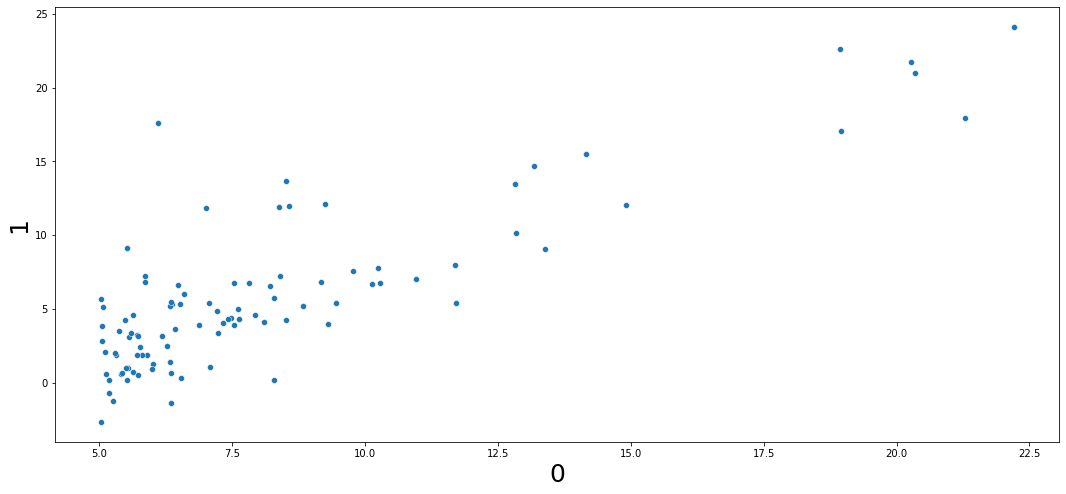

In [51]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data[0], data[1])
plt.xlabel('0', size=25)
plt.ylabel('1', size=25)
plt.savefig('Visualize1.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


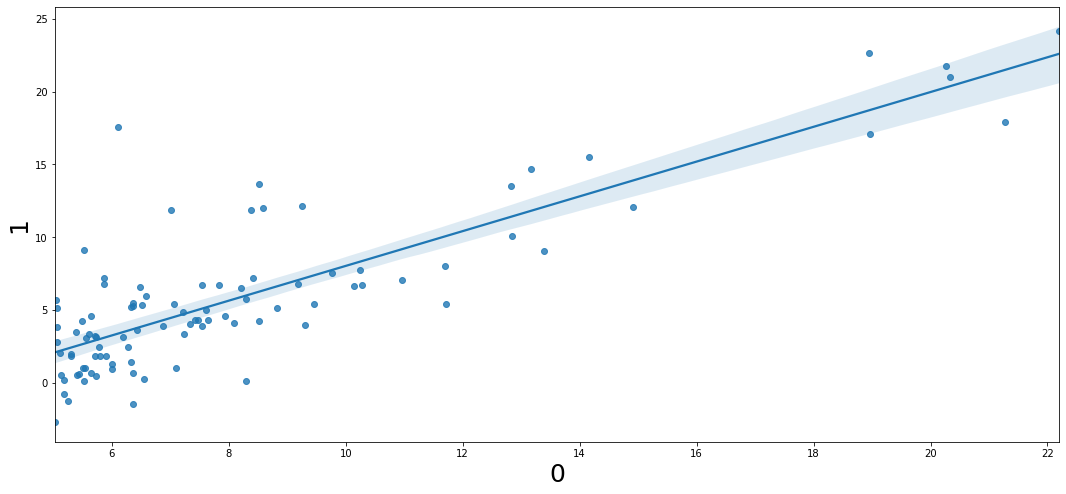

In [52]:
plt.figure(figsize=(18, 8))
sns.regplot(data[0], data[1])
plt.xlabel('0', size=25)
plt.ylabel('1', size=25)
plt.savefig('Visualize2.png')
plt.show()

[0.47438422672610003, -0.6258415171087259]


In [61]:
# h(x) = theta0 + theta1 * x

def hypothesis(theta, x):
    return theta[0]+ theta[1]*x

In [62]:
import numpy as np 
m = len(data)
#importing numpy to carry out calculations 

def cost_calc(theta, x, y):
    return (1/2*m) * np.sum((hypothesis(theta, x)- y)**2)

In [68]:
def grad_descent(theta, x, y, epoch=100, alpha=0.001):
    cost = []
    i = 0 
    while i < epoch: 
        hx = hypothesis(theta, x)
        theta[0] -= alpha*np.sum((hx - y))/m
        theta[1] -= (alpha*np.sum((hx - y)*x))/m

        cost.append(cost_calc(theta, x, y))
        i +=1
    
    return theta, cost

In [69]:
def predict(theta, x, y, epoch=100, alpha=0.001):
    theta, cost = grad_descent(theta, x, y ,epoch, alpha)
    return hypothesis(theta, x), cost, theta

In [73]:
import random
def rand(start,end):
    return random.uniform(-1,1)
# let's initialize the theta to random number 
theta = [rand(-1,1), rand(-1,1)]
print(theta)
y_predict, cost, theta = predict(theta, data[0], data[1], 2000, 0.01)


[0.03216717140258396, -0.7096345566116669]


In [74]:
print(theta)

[-3.7852935033459802, 1.1819339889377702]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


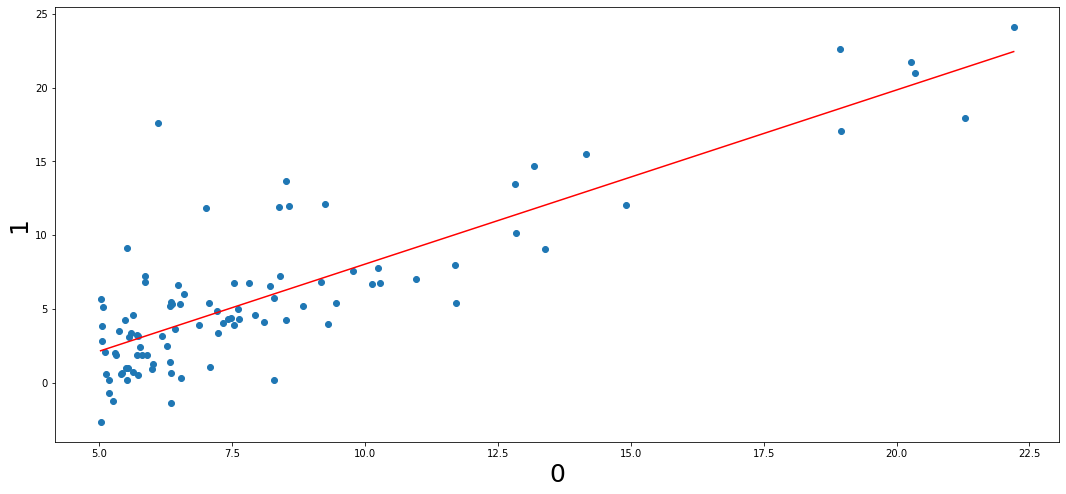

In [89]:
plt.figure(figsize=(18, 8))
plt.scatter(data[0], data[1])
plt.xlabel('0', size=25)
plt.ylabel('1', size=25)
sns.lineplot(data[0], y_predict,color='r')
plt.savefig('Visualize3.png')
plt.show()